In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import librosa
import librosa.display

ses = "/content/drive/MyDrive/Deneme/Tiny Dog Barking in Park.wav"
x,sr = librosa.load(ses)

In [ ]:
import IPython.display as ipd

ipd.Audio(ses)

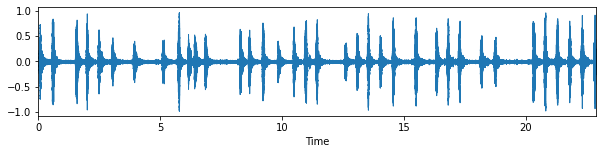

In [ ]:
plt.figure(figsize=(10,2))
librosa.display.waveplot(x,sr=sr)

## **Log-mel Spectogram😈**

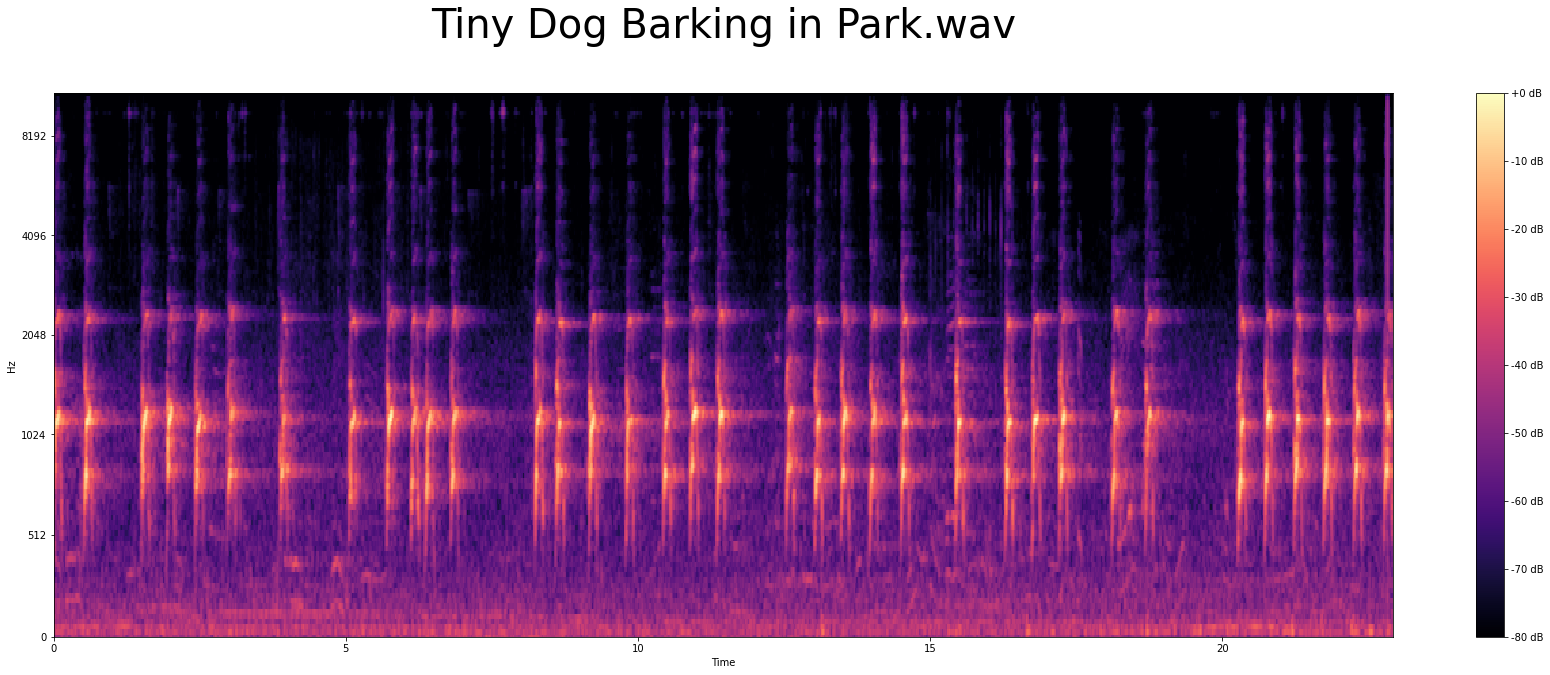

In [ ]:
y,sr = librosa.load("/content/drive/MyDrive/Deneme/Tiny Dog Barking in Park.wav")
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)
fig, ax = plt.subplots(figsize=(30,10))
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title="Tiny Dog Barking in Park.wav\n")
ax.title.set_fontsize(40)

In [ ]:
def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

In [ ]:
import os
def get_dataframe(folderName):
  specs = []
  names = []
  length = []
  for filename in os.listdir(folderName):
    if filename[-4:] == ".wav":
      ses = os.path.join(folderName, filename)
      y,sr = librosa.load(ses)
      S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
      S_dB = librosa.power_to_db(S, ref=np.max)
      S_dB = scale_minmax(S_dB, 0, 255).astype(np.uint8)
      S_dB = np.flip(S_dB, axis=0)
      img = np.uint8(matplotlib.cm.inferno(S_dB)*255)
      img = np.delete(img, [3], axis=2)
      plt.imsave(os.path.join("/content/drive/MyDrive/deneme_images", filename)+".png", img)
      specs.append(img)
      names.append(filename)
      length.append(img.shape[1])
      df = pd.DataFrame(
          {'file_name': names,
          'Spectogram': specs,
           'Length': length
          })
  return df

In [ ]:
folderName = '/content/drive/MyDrive/Dataset'
df = get_dataframe(folderName)
df.head(10)

,file_name,Spectogram,Length
0,Digging with shovel.wav,"[[[147, 37, 103], [219, 79, 58], [224, 86, 52]...",1002
1,Crumple Paper.wav,"[[[175, 49, 91], [189, 55, 83], [227, 88, 50],...",908
2,DeLorean DMC-12 - Approach and Stop.wav,"[[[0, 0, 3], [0, 0, 3], [0, 0, 3], [0, 0, 3], ...",731
3,dish drumroll metal spoons.wav,"[[[251, 170, 14], [251, 179, 24], [251, 166, 1...",979
4,crumpling paper.wav,"[[[212, 72, 65], [215, 75, 62], [201, 63, 74],...",911
5,Deplacez-vous.wav,"[[[0, 0, 3], [0, 0, 3], [0, 0, 3], [0, 0, 3], ...",680
6,Dog growling.wav,"[[[190, 56, 82], [171, 46, 93], [109, 24, 110]...",1110
7,door-knock-open-close-wooden_close.wav,"[[[0, 0, 6], [1, 1, 11], [0, 0, 3], [0, 0, 3],...",1076
8,Driving.wav,"[[[0, 0, 3], [0, 0, 3], [16, 9, 47], [23, 11, ...",655
9,End of rain 090616.wav,"[[[10, 7, 35], [13, 8, 40], [16, 9, 47], [11, ...",692


In [ ]:
metadata_df = pd.read_csv('/content/drive/MyDrive/Deneme/clotho_metadata_development.csv')
metadata_df = metadata_df.drop(['sound_id',	'sound_link',	'start_end_samples',	'manufacturer',	'license'], axis = 1)
metadata_df.head()

,file_name,keywords
0,Distorted AM Radio noise.wav,noise;radio
1,Paper_Parchment_Rustling.wav,movement;parchment;scroll;crinkle;pages;moving...
2,03 Whales Slowing Down.wav,boat;voice;earth;sea;humpback-whales;live-reco...
3,Rope tied to boat in port.wav,tanker;sail-boat;rope;ocean;shipping;yacht;sai...
4,carpenter bee.wav,bugs;field-recording;insects


In [ ]:
df = pd.merge(df, metadata_df, on="file_name")
df.head()

,file_name,Spectogram,Length,keywords
0,Digging with shovel.wav,"[[[147, 37, 103], [219, 79, 58], [224, 86, 52]...",1002,clang;dig;fight;hit;shovel;swing;whoosh
1,Crumple Paper.wav,"[[[175, 49, 91], [189, 55, 83], [227, 88, 50],...",908,crumple;paper
2,DeLorean DMC-12 - Approach and Stop.wav,"[[[0, 0, 3], [0, 0, 3], [0, 0, 3], [0, 0, 3], ...",731,back-to-the-future;DMC-12;sounds;engine;delorean
3,dish drumroll metal spoons.wav,"[[[251, 170, 14], [251, 179, 24], [251, 166, 1...",979,drum-roll;metal;spoons;drumroll;dish
4,crumpling paper.wav,"[[[212, 72, 65], [215, 75, 62], [201, 63, 74],...",911,actions;field-recording;paper;close-mic
